## 선형회귀

### k-최근접 이웃 회귀 문제점
- 농어데이터 : http://bit.ly/perch_data

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
perch_length.shape

(56,)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 분류는 입력이 (길이, 무게)쌍이었음. 타겟이 (도미, 빙어), 물고기 종류 에측
- 회귀는 입력이 길이, 타겟 무게 , 길이에 따른 무게 예측

In [5]:
# 훈련세트, 데스트세트 분리
# X_train, y_train, X_target, y_target와 같이 많이 사용
train_input, test_input, train_target, test_target =train_test_split (

    perch_length, perch_weight, random_state=42
)

In [6]:
train_input.shape

(42,)

In [7]:
test_input.shape

(14,)

In [8]:
# 갑 입력 시 2차원 배열이 되어야하기 때문에 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [9]:
train_input.shape

(42, 1)

In [10]:
test_input.shape

(14, 1)

In [11]:
#k - 최근접 이웃회귀
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [13]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [14]:
knr.score(test_input , test_target)

0.9746459963987609

In [15]:
knr.predict([[80,]])

array([1033.33333333])

In [16]:
knr.predict([[50,]])

array([1033.33333333])

- 농어 길이가 50cm가 되면 무게는 1033.3g 예측됨
- 실제 농어의 무게는 더 많이 나감

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [19]:
# 50cm 농어 최근접 이웃 구하기
pred_perch =[[50,]]
distances, indexs = knr.kneighbors(pred_perch)

In [20]:
# 시본 형태로 차트 변경
sns.set_style('darkgrid')

# 시본 사용시 한글깨짐 해결
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus':False})  

In [21]:
train_input[indexs]

array([[[44.],
        [43.],
        [43.]]])

In [22]:
np.mean(train_target[indexs])

1033.3333333333333

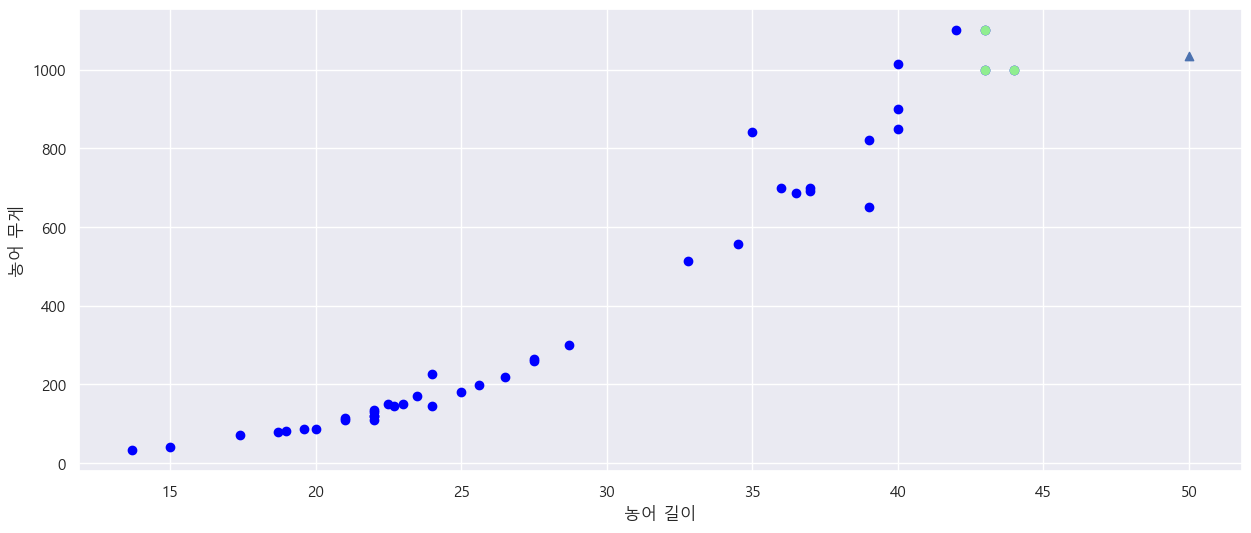

In [23]:
# 농어 훈련세트 산점도 그리기
plt.figure(figsize=(15,6))
plt.scatter(train_input, train_target, label = '훈련세트' , color = 'blue')
plt.scatter(train_input[indexs], train_target[indexs], color = 'lightgreen', label = '최근접데이터')
plt.scatter(50.0, 1033.3333 , marker='^', label='예측데이터')
plt.xlabel('농어 길이')
plt.ylabel('농어 무게')
plt.show()


- 최근접 데이터 3개의 무게의 평균값이 1033.33333이 길이 50cm인 농어의 예측무게 1033.3333이다.
- 길이 80cm인 농어의 예측값 또한 1033.3333이다. 최근접 데이터 3개가 동일하므로 

#### 선형회귀
- 대표적인 회귀 알고리즘. 직선을 학습하는 알고리즘
- 간단하고 성능이 뛰어남

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr

LinearRegression()

In [26]:
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [27]:
lr.score(test_input, test_target)

0.824750312331356

In [28]:
lr.predict([[50,]])

array([1241.83860323])

- 50cm 농어는 1241.9g 정도 무게라고 예측됨

In [29]:
# 선형 회귀 모델 확인
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [30]:
lr.coef_ # 기울기, 가중치

array([39.01714496])

In [31]:
lr.intercept_ # 절편


-709.0186449535474

- 농어무게 = ax(농어길이) + b
    - a(기울기)->39.01714496
    - b(절편)->-709.0186449535474

In [32]:
39.01714496*50+-709.0186449535474

1241.8386030464528

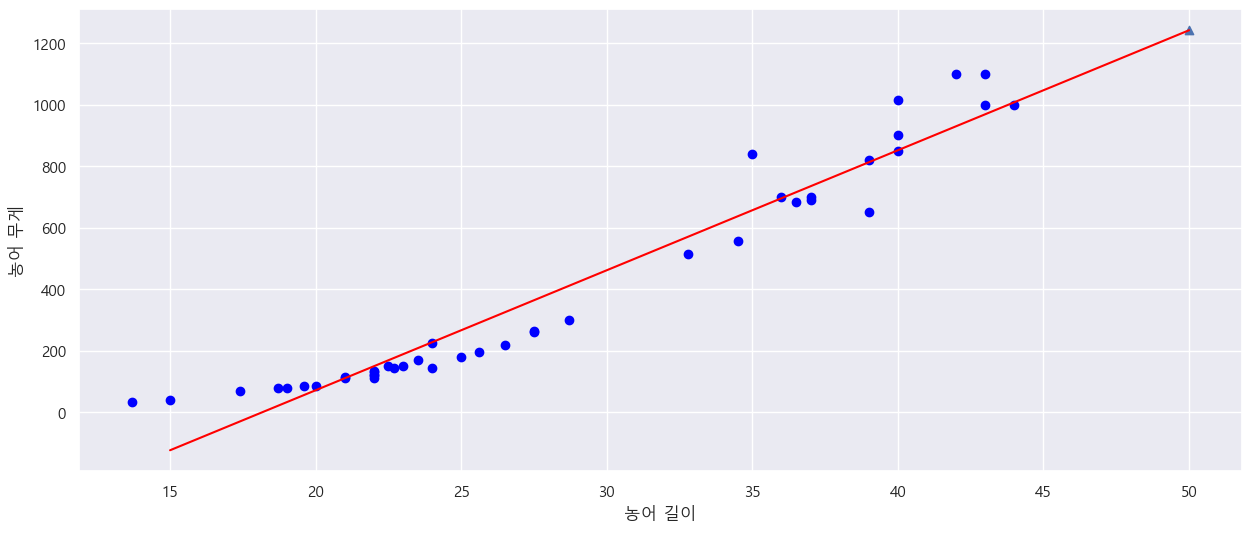

In [33]:
# 농어 훈련세트 산점도 그리기
plt.figure(figsize=(15,6))
plt.scatter(train_input, train_target, label = '훈련세트' , color = 'blue')
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], color ='red')
plt.scatter(50.0,1241.838 , marker='^', label='예측데이터')
plt.xlabel('농어 길이')
plt.ylabel('농어 무게')
plt.show()

In [34]:
# 훈련데이터 성능
lr.score(train_input, train_target)

0.9398463339976041

In [35]:
# 테스트데이터 성능
lr.score(test_input, test_target)

0.824750312331356

- 길이를 넣었을 때, 물고기 무게의 예측값이 음수가 나온다.
- 선형회귀도 아직 문제가 있다.

In [36]:
lr.predict([[10,]])

array([-318.84719532])

In [37]:
lr.predict([[9.8,]])

array([-326.65062431])

#### 다항회귀
- 2차 방정식이 되어야 하기 때문

In [38]:
train_poly = np.column_stack((train_input ** 2 , train_input))
test_poly = np.column_stack((test_input ** 2 , test_input))

In [39]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [40]:
train_input.shape

(42, 1)

In [41]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [42]:
train_poly.shape

(42, 2)

In [43]:
# 훈련세트 42행, 테스트세트 14행
# 특성 2
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [44]:
# 다항회귀 문제 해결
lr2 = LinearRegression()
lr2

LinearRegression()

In [45]:
#길이 특성에 대한 무게 결과를 훈련
lr2.fit(train_poly, train_target)

LinearRegression()

In [46]:
lr2.score(test_poly, test_target)

0.9775935108325122

In [47]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- 길이의 제곱에 들어갈 기울기  1.01433211
- 길이에 들어갈 기울기 -21.55792498
- 절편 116.0502107827827

In [48]:
# 농어길이 50cm에 대한 무게 예측
lr2.predict([[50**2,50]])

array([1573.98423528])

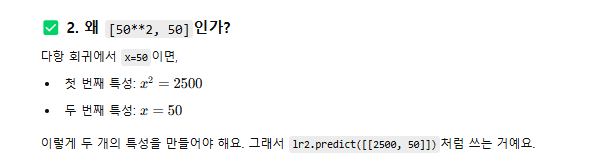


In [49]:
# 예측된 값 == 기울기와 절편으로 다항식 계산값
1.01433211 * (50**2) + -21.55792498*50 +116.0502107827827

1573.9842367827825

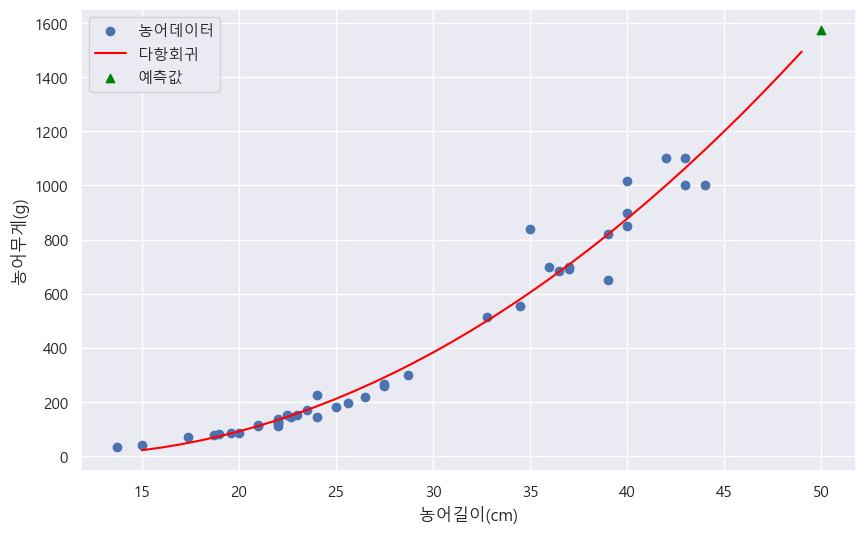

In [50]:
# 다항회귀 차트

# 구간별 직선을 그리기 위해서 15~49까지 정수 배열 생성
point  = np.arange(15,50)

plt.figure(figsize= (10,6))
plt.scatter(train_input, train_target, label='농어데이터')

#15에서 49사이에 2차방정식을 그래프로 그림
plt.plot(point, (1.01433211 * (point**2)) + (-21.55792498*point) +116.0502107827827, color='red', label='다항회귀')

# 50cm 농어  데이터 표시
plt.scatter([50], [1573.9842367827825] , marker='^', color = 'green', label = '예측값')
plt.xlabel('농어길이(cm)')
plt.ylabel('농어무게(g)')
plt.legend()
plt.show()

In [51]:
lr2.score(train_poly, train_target)

0.9706807451768623

#### 결론
- 직선 선형회귀
    - 훈련세트 정확도 : 93.9%
    - 테스트세트 정확도 : 82.5%
    - 과대적합 (훈련세트 정확도가 테스트세트 정확도보다 높다.)
- 다항회귀
    - 훈련세트 정확도: 97.1%
    - 테스트세트 정확도: 97.8%

- `선형회귀`는 특성(입력), 타겟 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는 것
    - 특성이 하나면 직선(단항) 방정식이 생성
- 선형방정식의 `계수(기울기/가중치)`와 `절편`이 저장
- `다항회귀`는 다항 방정식으로 특성과 타겟의 관계를 나타냄
-`LinearRegression` - 가장 단순하고 정확도가 높음. 제일 많이 사용되고 있음